# Forecasting

Axel Wieslander Jansson

* Analyze the data
* Why are there spikes in november and december
* Is there a trend in the data
* Train the model with data before 2022-04-01 and test the data with the remaining data
* Explain the prognosis of the training data, what are the black, blue and light blue markings?
* Print the trend and seasonality

2nd part
* Produce 3 different models, one for chilled, one for fire and one for normal packages and predict the incoming packages for june 2022.

Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

C:\Users\Axl_w\anaconda3\envs\prophet-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Importing the dataset

In [2]:
packages_df = pd.read_csv('../../Datasets/incoming_packages.csv')

Investigating the dataset. 

The dataset contains information of incoming packages over about a two year period

In [5]:
print(packages_df['date'].min())
print(packages_df['date'].max())
packages_df.head(10)

2020-01-01
2022-04-30


,date,total_packages,cooled_packages,fire_packages,normal_packages
0,2020-01-01,1745,370,488,887
1,2020-01-02,1847,308,402,1137
2,2020-01-03,1842,314,394,1134
3,2020-01-04,664,131,181,352
4,2020-01-05,871,137,190,544
5,2020-01-06,1744,367,410,967
6,2020-01-07,1848,383,457,1008
7,2020-01-08,1711,279,388,1044
8,2020-01-09,1767,294,440,1033
9,2020-01-10,1717,298,353,1066


In [7]:
packages_df.shape

(851, 5)

In [8]:
packages_df.tail(10)

,date,total_packages,cooled_packages,fire_packages,normal_packages
841,2022-04-21,2433,554,577,1302
842,2022-04-22,2239,481,487,1271
843,2022-04-23,1151,224,329,598
844,2022-04-24,861,142,149,570
845,2022-04-25,2420,431,537,1452
846,2022-04-26,2268,467,503,1298
847,2022-04-27,2466,432,641,1393
848,2022-04-28,2436,545,556,1335
849,2022-04-29,2302,368,547,1387
850,2022-04-30,1270,227,331,712


In [9]:
print(f"Highest amount of total packages on a single day: {packages_df['total_packages'].max()}")
print(f"Least amount of total packages on a single day: {packages_df['total_packages'].min()}")

Highest amount of total packages on a single day: 4397
Least amount of total packages on a single day: 0


In [10]:
packages_df[packages_df['total_packages'] == packages_df['total_packages'].max()]

,date,total_packages,cooled_packages,fire_packages,normal_packages
729,2021-12-30,4397,933,1246,2218


## Incoming packages
The highest amount of daily packages recieved are at the end of November and in the end of december

In [11]:
packages_df[packages_df['total_packages'] >= 3000]

,date,total_packages,cooled_packages,fire_packages,normal_packages
329,2020-11-25,3452,762,913,1777
330,2020-11-26,3644,833,948,1863
331,2020-11-27,3494,687,829,1978
332,2020-11-28,3354,747,926,1681
333,2020-11-29,4005,715,917,2373
334,2020-11-30,3865,826,1044,1995
356,2020-12-22,3169,600,651,1918
357,2020-12-23,3030,591,748,1691
359,2020-12-25,3881,730,1088,2063
360,2020-12-26,3909,740,768,2401


## 0 packages are recieved on christmas eve and new years eve.

In [12]:
packages_df[packages_df['total_packages'] == packages_df['total_packages'].min()]

,date,total_packages,cooled_packages,fire_packages,normal_packages
358,2020-12-24,0,0,0,0
365,2020-12-31,0,0,0,0
723,2021-12-24,0,0,0,0
730,2021-12-31,0,0,0,0


No duplicated values are found

In [13]:
packages_df.duplicated().sum()

0

No empty values are found in any of the columns

In [14]:
packages_df.isna().sum()

date               0
total_packages     0
cooled_packages    0
fire_packages      0
normal_packages    0
dtype: int64

### Plotting the data

There are dips in the amount of incoming packages during summer time and peaks during novemeber

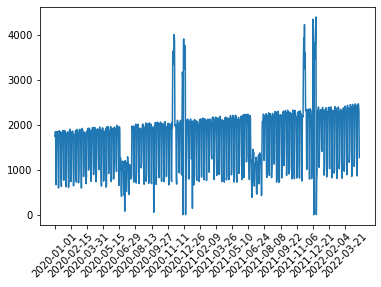

In [15]:
#Spacing of x-labels
size = packages_df.shape[0]
xtick_values = []

#Number of days between each label. 45days = about 1 and a half month
spacing = 45

tick_number = int(np.round(size/spacing))
for i in range(tick_number):
    add_xlabel = packages_df.iloc[i*spacing]["date"]
    xtick_values.append(add_xlabel)



plt.plot(packages_df["date"],packages_df["total_packages"])

plt.xticks(xtick_values,rotation = "45")

plt.show();

## Splitting into test and training data
yhat = the predicited value
yhat_lower,yhat_upper = confidence interval

In [16]:
X_train = packages_df[packages_df["date"] < "2022-04-01"]
X_train = X_train.drop(columns = ['cooled_packages','fire_packages','normal_packages'])
X_test = packages_df[packages_df["date"] >= "2022-04-01"]
X_test = X_test.drop(columns = ['cooled_packages','fire_packages','normal_packages'])

X_train.columns = ['ds','y']

proph = Prophet()

proph.fit(X_train)

X_train_prophet_forecast = proph.predict(X_train)
X_train_prophet_forecast[['ds','yhat','yhat_lower','yhat_upper']].head()



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,2238.802519,1725.756751,2739.168073
1,2020-01-02,2169.093244,1671.871786,2672.323887
2,2020-01-03,2120.303551,1655.106259,2610.844094
3,2020-01-04,1094.156787,594.979234,1602.491652
4,2020-01-05,1094.642289,585.333395,1599.454118


## Plotting

Black dots = Original datapoints (training data)

Dark blue line = forecasted value (yhat)

light blue line = forecasted value lower and upperbounds (yhat_lower, yhat_upper)

There is a higher amount of incoming packages during the weekdays than during the weekends.

A lower amount of packages are recieved in the summer possibly because people that would usally place orders are on vacation. During the winter months a higher amount of deliveries are made, which might be due to people prefering to get items delivered to them instead of going in the cold weather. A big increase can be seen during december due to christmas shopping.

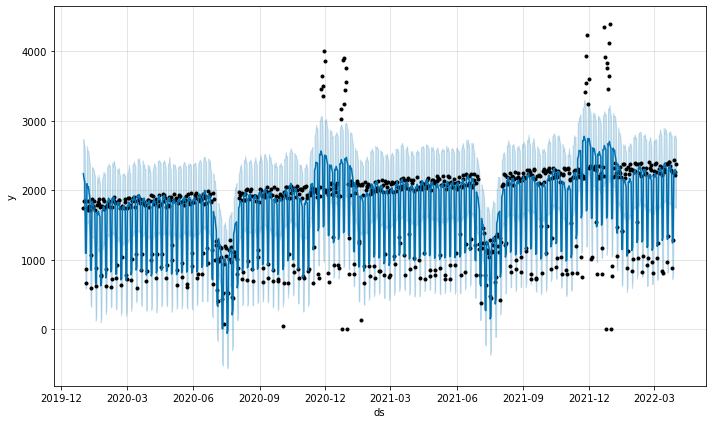

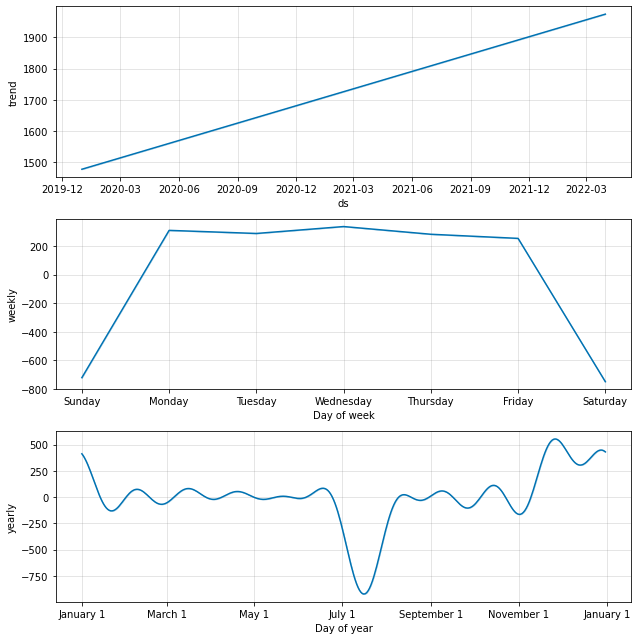

In [17]:
fig1 = proph.plot(X_train_prophet_forecast)
plt.show()

fig2 = proph.plot_components(X_train_prophet_forecast)

## Comparison between fbprophet and 2000 package prediction

The evaluation is for packages incoming during April.

In [18]:
X_test.tail()

,date,total_packages
846,2022-04-26,2268
847,2022-04-27,2466
848,2022-04-28,2436
849,2022-04-29,2302
850,2022-04-30,1270


The prediction produced by the FBProphet method is a better estimation than the 2000 package estimation.

In [19]:
prediction = 2000

X_test = packages_df[packages_df["date"] >= "2022-04-01"]

X_test_2000_prediction = X_test.copy().reset_index().drop(columns = ['index'])
X_test_forecast = X_test.copy().reset_index().drop(columns = ['index'])

X_test_2000_prediction['pred'] = prediction


future_april = X_test['date']
future_april = future_april.to_frame()
future_april.columns = ['ds']

forecast_april = proph.predict(future_april)
forecast_april = forecast_april.yhat

X_test_forecast['pred'] = forecast_april



def meanAbsoluteError(df):
    number_of_entries = df.shape[0]
    sumOfAbsValues = (df["total_packages"] - df["pred"]).abs().sum()
    mae = sumOfAbsValues/number_of_entries
    return mae

mae_2000_prediction = meanAbsoluteError(X_test_2000_prediction)

mae_forecast_prediction = meanAbsoluteError(X_test_forecast)

print(f"The mae for the prediction of 2000 packages is: {mae_2000_prediction}")
print(f"The mae for the prediction of FBProphet is: {mae_forecast_prediction}")


The mae for the prediction of 2000 packages is: 524.9666666666667
The mae for the prediction of FBProphet is: 117.49426927800081


Prognosis 2022

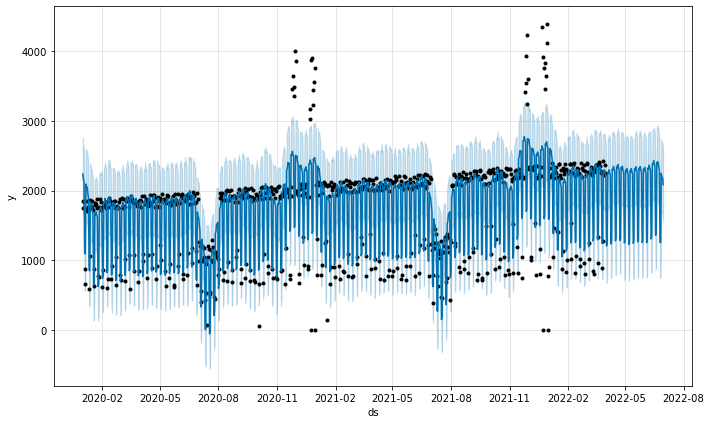

In [20]:
future = pd.DataFrame({'ds': pd.date_range('2020-01-01', '2022-06-30')})


forecast = proph.predict(future)
proph.plot(forecast)
plt.show()

# Välgodkänt del

## Cooled packages


För att föurtspå antalet special paket läggs en model för totala antalet paket till som en extra regressor

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


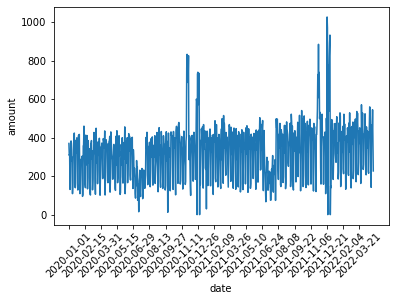

In [21]:
#Spacing of x-labels
size = packages_df.shape[0]
xtick_values = []

#Number of days between each label. 45days = about 1 and a half month
spacing = 45

tick_number = int(np.round(size/spacing))
for i in range(tick_number):
    add_xlabel = packages_df.iloc[i*spacing]["date"]
    xtick_values.append(add_xlabel)

plt.plot(packages_df["date"],packages_df["cooled_packages"])

plt.xticks(xtick_values,rotation = "45")
plt.xlabel('date')
plt.ylabel('amount')
plt.show()

## creating a model of the total amount of incoming packages

In [22]:
prophet = Prophet()
#Creating test and train data.
X_train = packages_df[packages_df["date"] < "2022-04-01"]
X_train = X_train.drop(columns = ['cooled_packages','fire_packages','normal_packages'])
X_train.columns = ['ds','y']


#Create a model of the total amount of packages
prophet.fit(X_train)

#Create new datapoints for the totala packages based on the actual values of total packages
total_forecast = prophet.predict(X_train)

#Date of future values to be predicted
future_total_pack = pd.DataFrame({'ds': pd.date_range('2022-04-01','2022-04-30')})

#Make prediction of future total packages
total_future_forecast = prophet.predict(future_total_pack)
total_package_forecast = total_future_forecast['yhat']

print(total_package_forecast.head(5))

total_forecast_df = pd.concat([total_forecast['ds'],total_forecast['yhat']],axis=1)
total_forecast_df.columns = ['ds','y']
#Dataframe of dates and values for an easy overview
total_forecast_df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0    2209.413661
1    1205.732681
2    1233.730675
3    2265.706756
4    2247.017473
Name: yhat, dtype: float64


,ds,y
0,2020-01-01,2238.802519
1,2020-01-02,2169.093244
2,2020-01-03,2120.303551
3,2020-01-04,1094.156787
4,2020-01-05,1094.642289
...,...,...
816,2022-03-27,1261.810437
817,2022-03-28,2284.691248
818,2022-03-29,2256.416458
819,2022-03-30,2299.246271


# Prediction of cooled packages

In [23]:
#Preparing test and train data
X_train_cooled = packages_df[packages_df["date"] < "2022-04-01"]
X_train_cooled = X_train_cooled.drop(columns = ['total_packages','fire_packages','normal_packages'])
X_train_cooled.columns = ['ds','y']

X_test_cooled = packages_df[packages_df["date"] >= "2022-04-01"]
X_test_cooled = X_test_cooled.drop(columns = ['total_packages','fire_packages','normal_packages'])
#Add the total_packages Test values to the dataframe, these will be used in the additional regressor
X_train_cooled['total_pack_prediction'] = total_forecast_df['y']

X_train_cooled.head(5)

,ds,y,total_pack_prediction
0,2020-01-01,370,2238.802519
1,2020-01-02,308,2169.093244
2,2020-01-03,314,2120.303551
3,2020-01-04,131,1094.156787
4,2020-01-05,137,1094.642289


In [24]:
#Creating the new model
prophet_cooled = Prophet()
#Adding the total_packages predictor
prophet_cooled.add_regressor('total_pack_prediction')
prophet_cooled.fit(X_train_cooled);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Cooled packages future prediction

In [25]:
cooled_future = pd.DataFrame({'ds': pd.date_range('2022-04-01','2022-04-30')})
cooled_future['total_pack_prediction'] = total_package_forecast
cooled_forecast = prophet_cooled.predict(cooled_future)

print(cooled_forecast['yhat'])

0     419.211748
1     237.383114
2     236.957067
3     438.718088
4     433.988441
5     441.818098
6     435.649369
7     419.272139
8     238.608827
9     239.152177
10    441.653739
11    437.412184
12    445.463867
13    439.247760
14    422.560613
15    241.341501
16    241.108860
17    442.647906
18    437.297622
19    444.139779
20    436.662143
21    418.711822
22    236.277947
23    234.926867
24    435.487811
25    429.338266
26    435.591592
27    427.759073
28    409.702406
29    227.415841
Name: yhat, dtype: float64


In [26]:
cooled_forecast_values = cooled_forecast[cooled_forecast['ds'] >= ('2022-04-01')]
cooled_april_packages = cooled_forecast_values['yhat']

cooled_april_packages=cooled_april_packages.to_frame()
cooled_april_packages.columns = ['cooled_prediction']


X_test_cooled=X_test_cooled.reset_index().drop(columns = ['index'])
X_test_cooled['cooled_prediction'] = cooled_april_packages


def meanAbsoluteError(df):
    number_of_entries = df.shape[0]
    sumOfAbsValues = (df["cooled_packages"] - df["cooled_prediction"]).abs().sum()
    mae = sumOfAbsValues/number_of_entries
    return mae

maeCooled = meanAbsoluteError(X_test_cooled)

print(f"\nThe mean absolute error of the incoming cooled packages in april is: {maeCooled} ")


The mean absolute error of the incoming cooled packages in april is: 40.095573583461096 


## Plotting the components of the cooled packages prediciton

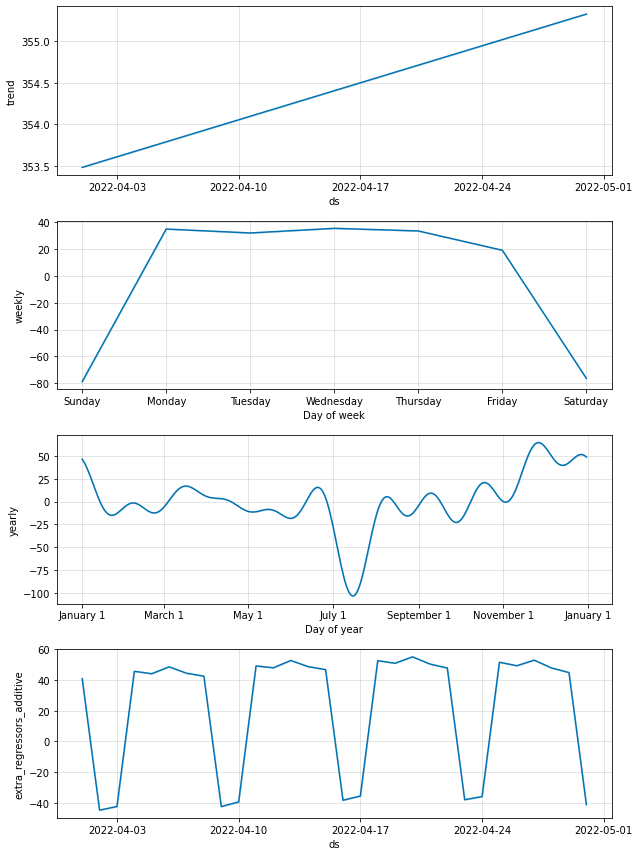

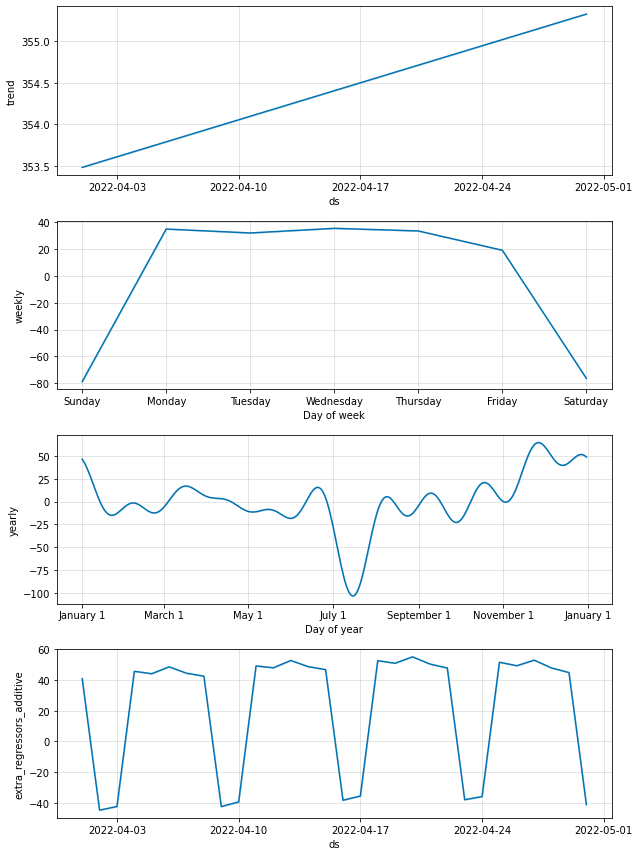

In [27]:
prophet_cooled.plot_components(cooled_forecast)

# June prediction cooled packages

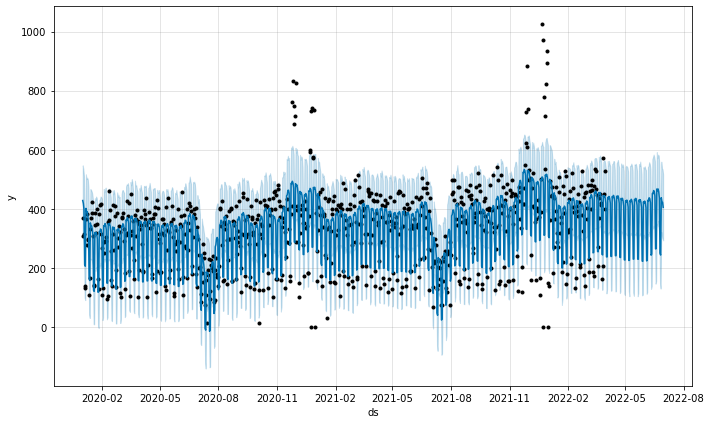

In [30]:
#Date of future values to be predicted
future_june_total = pd.DataFrame({'ds': pd.date_range('2020-01-01','2022-06-30')})

#Make prediction of future total packages
future_june_total_forecast = prophet.predict(future_june_total)

future_june_cooled = pd.DataFrame({'ds': pd.date_range('2020-01-01','2022-06-30')})
future_june_cooled['total_pack_prediction'] = future_june_total_forecast['yhat']
cooled_forecast_june = prophet_cooled.predict(future_june_cooled)

prophet_cooled.plot(cooled_forecast_june)
plt.show()

# Fire packages

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


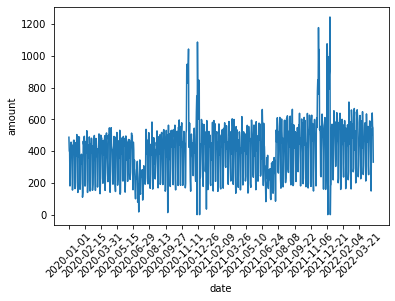

In [31]:
#Spacing of x-labels
size = packages_df.shape[0]
xtick_values = []

#Number of days between each label. 45days = about 1 and a half month
spacing = 45

tick_number = int(np.round(size/spacing))
for i in range(tick_number):
    add_xlabel = packages_df.iloc[i*spacing]["date"]
    xtick_values.append(add_xlabel)

plt.plot(packages_df["date"],packages_df["fire_packages"])

plt.xticks(xtick_values,rotation = "45")
plt.xlabel('date')
plt.ylabel('amount')
plt.show()

In [32]:
#Preparing test and train data
X_train_fire = packages_df[packages_df["date"] < "2022-04-01"]
X_train_fire = X_train_fire.drop(columns = ['total_packages','cooled_packages','normal_packages'])
X_train_fire.columns = ['ds','y']

X_test_fire = packages_df[packages_df["date"] >= "2022-04-01"]
X_test_fire = X_test_fire.drop(columns = ['total_packages','cooled_packages','normal_packages'])

#Add the total_packages Test values to the dataframe, these will be used in the additional regressor
X_train_fire['total_pack_prediction'] = total_forecast_df['y']

X_train_fire.head(5)

,ds,y,total_pack_prediction
0,2020-01-01,488,2238.802519
1,2020-01-02,402,2169.093244
2,2020-01-03,394,2120.303551
3,2020-01-04,181,1094.156787
4,2020-01-05,190,1094.642289


In [33]:
#Creating the new model
prophet_fire = Prophet()
#Adding the total_packages predictor
prophet_fire.add_regressor('total_pack_prediction')
prophet_fire.fit(X_train_fire);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
fire_future = pd.DataFrame({'ds': pd.date_range('2022-04-01','2022-04-30')})
fire_future['total_pack_prediction'] = total_package_forecast
fire_forecast = prophet_fire.predict(fire_future)

print(fire_forecast['yhat'])


0     520.895993
1     283.339740
2     288.902380
3     539.171870
4     541.283259
5     549.354430
6     540.899920
7     527.759787
8     291.917968
9     298.856200
10    550.113357
11    552.788672
12    560.978604
13    552.191283
14    538.275539
15    301.238891
16    306.600653
17    555.949969
18    556.447351
19    562.259482
20    550.971330
21    534.512626
22    294.973184
23    297.953287
24    545.119066
25    543.701510
26    547.928965
27    535.437242
28    518.194437
29    278.315026
Name: yhat, dtype: float64


In [35]:
fire_forecast_values = fire_forecast[fire_forecast['ds'] >= ('2022-04-01')]
fire_april_packages = fire_forecast_values['yhat']
fire_april_packages = fire_april_packages.to_frame()
fire_april_packages.columns = ['fire_prediction']

X_test_fire = X_test_fire.reset_index().drop(columns = ['index'])
X_test_fire['fire_prediction'] = fire_april_packages

def meanAbsoluteError(df):
    number_of_entries = df.shape[0]
    sumOfAbsValues = (df["fire_packages"] - df["fire_prediction"]).abs().sum()
    mae = sumOfAbsValues/number_of_entries
    return mae

maeFire = meanAbsoluteError(X_test_fire)

print(f"\nThe mean absolute error of the incoming fire packages in april is: {maeFire} ")


The mean absolute error of the incoming fire packages in april is: 49.03613606787353 


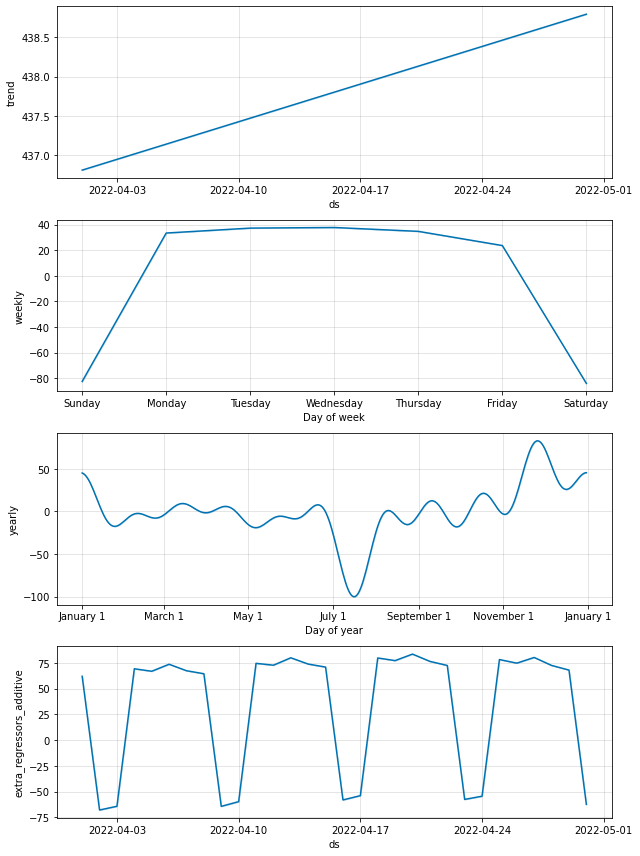

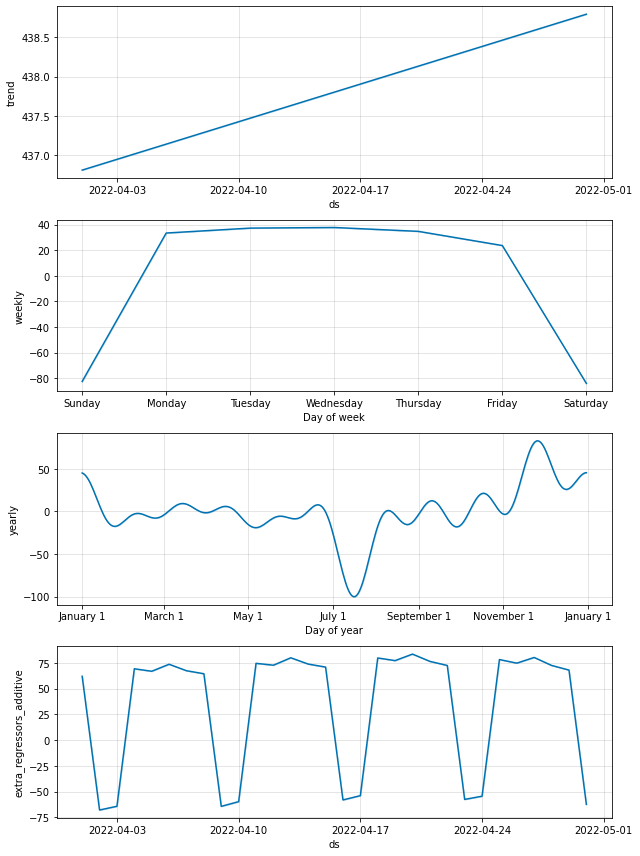

In [36]:
prophet_fire.plot_components(fire_forecast)

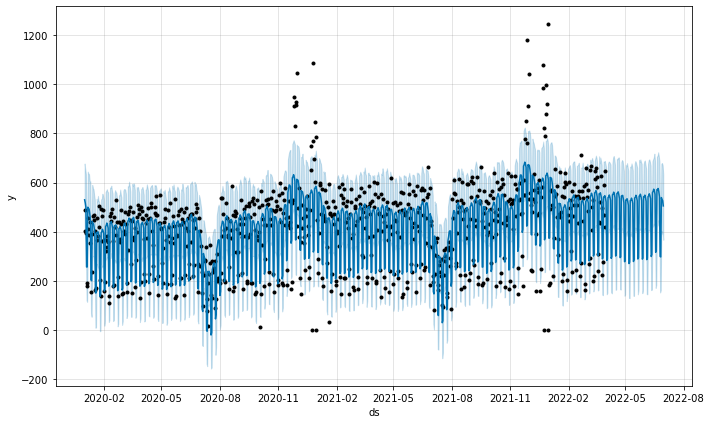

In [37]:
#Date of future values to be predicted
future_june_total = pd.DataFrame({'ds': pd.date_range('2020-01-01','2022-06-30')})

#Make prediction of future total packages
future_june_total_forecast = prophet.predict(future_june_total)

future_june_fire = pd.DataFrame({'ds': pd.date_range('2020-01-01','2022-06-30')})
future_june_fire['total_pack_prediction'] = future_june_total_forecast['yhat']
fire_forecast_june = prophet_fire.predict(future_june_fire)

prophet_fire.plot(fire_forecast_june)
plt.show()

## Normal packages

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


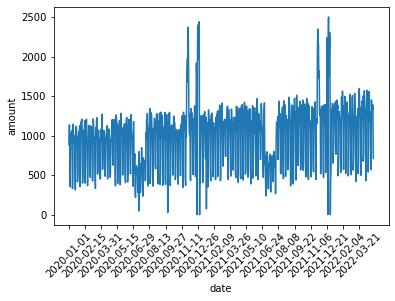

In [38]:
#Spacing of x-labels
size = packages_df.shape[0]
xtick_values = []

#Number of days between each label. 45days = about 1 and a half month
spacing = 45

tick_number = int(np.round(size/spacing))
for i in range(tick_number):
    add_xlabel = packages_df.iloc[i*spacing]["date"]
    xtick_values.append(add_xlabel)

plt.plot(packages_df["date"],packages_df["normal_packages"])

plt.xticks(xtick_values,rotation = "45")
plt.xlabel('date')
plt.ylabel('amount')
plt.show()

In [39]:
#Preparing test and train data
X_train_normal = packages_df[packages_df["date"] < "2022-04-01"]
X_train_normal = X_train_normal.drop(columns = ['total_packages','cooled_packages','fire_packages'])
X_train_normal.columns = ['ds','y']

X_test_normal = packages_df[packages_df["date"] >= "2022-04-01"]
X_test_normal = X_test_normal.drop(columns = ['total_packages','cooled_packages','fire_packages'])

#Add the total_packages Test values to the dataframe, these will be used in the additional regressor
X_train_normal['total_pack_prediction'] = total_forecast_df['y']

X_test_normal.head(5)

,date,normal_packages
821,2022-04-01,1500
822,2022-04-02,677
823,2022-04-03,767
824,2022-04-04,1391
825,2022-04-05,1568


In [40]:
#Creating the new model
prophet_normal = Prophet()
#Adding the total_packages predictor
prophet_normal.add_regressor('total_pack_prediction')
prophet_normal.fit(X_train_normal);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
normal_future = pd.DataFrame({'ds': pd.date_range('2022-04-01','2022-04-30')})
normal_future['total_pack_prediction'] = total_package_forecast
normal_forecast = prophet_normal.predict(normal_future)

print(normal_forecast['yhat'])

0     1271.889655
1      687.796875
2      710.704475
3     1290.538803
4     1274.513799
5     1311.232728
6     1277.347350
7     1284.352599
8      705.706475
9      733.568600
10    1317.726602
11    1305.278369
12    1344.736954
13    1312.692043
14    1320.605986
15     741.934082
16     768.862551
17    1351.233410
18    1336.224348
19    1372.450477
20    1336.621975
21    1340.335778
22     757.191126
23     779.522601
24    1357.319999
25    1337.903327
26    1370.019938
27    1330.498001
28    1331.034553
29     745.308105
Name: yhat, dtype: float64


In [42]:
normal_forecast_values = normal_forecast[normal_forecast['ds'] >= ('2022-04-01')]
normal_april_packages = normal_forecast_values['yhat']
normal_april_packages = normal_april_packages.to_frame()
normal_april_packages.columns = ['normal_prediction']



X_test_normal = X_test_normal.reset_index().drop(columns = ['index'])
X_test_normal['normal_prediction'] = normal_april_packages
print(X_test_normal)
def meanAbsoluteError(df):
    number_of_entries = df.shape[0]
    sumOfAbsValues = (df["normal_packages"] - df["normal_prediction"]).abs().sum()
    mae = sumOfAbsValues/number_of_entries
    return mae

maeNormal = meanAbsoluteError(X_test_normal)

print(f"\nThe mean absolute error of the incoming normal packages in april is: {maeNormal} ")

          date  normal_packages  normal_prediction
0   2022-04-01             1500        1271.889655
1   2022-04-02              677         687.796875
2   2022-04-03              767         710.704475
3   2022-04-04             1391        1290.538803
4   2022-04-05             1568        1274.513799
5   2022-04-06             1373        1311.232728
6   2022-04-07             1291        1277.347350
7   2022-04-08             1281        1284.352599
8   2022-04-09              429         705.706475
9   2022-04-10              499         733.568600
10  2022-04-11             1361        1317.726602
11  2022-04-12             1576        1305.278369
12  2022-04-13             1386        1344.736954
13  2022-04-14             1470        1312.692043
14  2022-04-15             1347        1320.605986
15  2022-04-16              540         741.934082
16  2022-04-17              872         768.862551
17  2022-04-18             1560        1351.233410
18  2022-04-19             1518

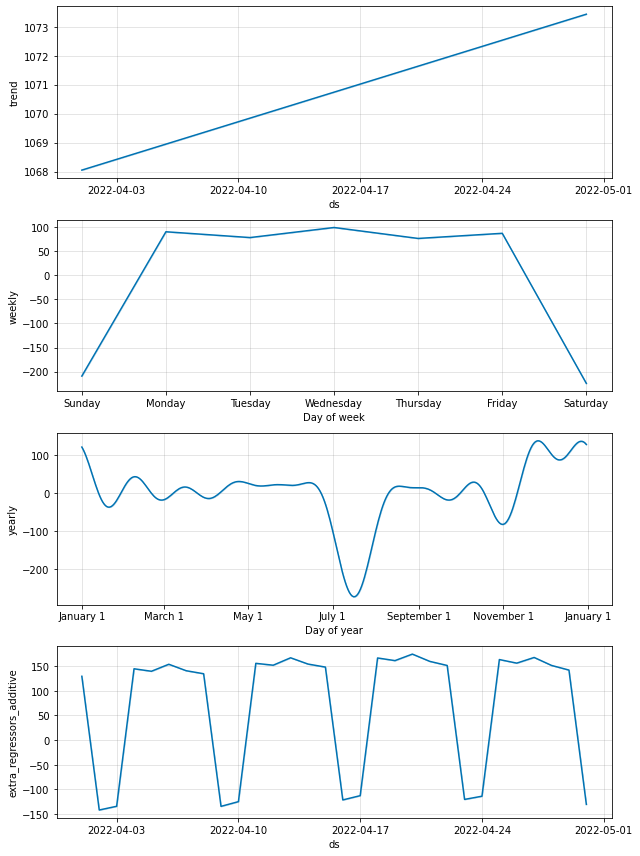

In [106]:
prophet_normal.plot_components(normal_forecast);

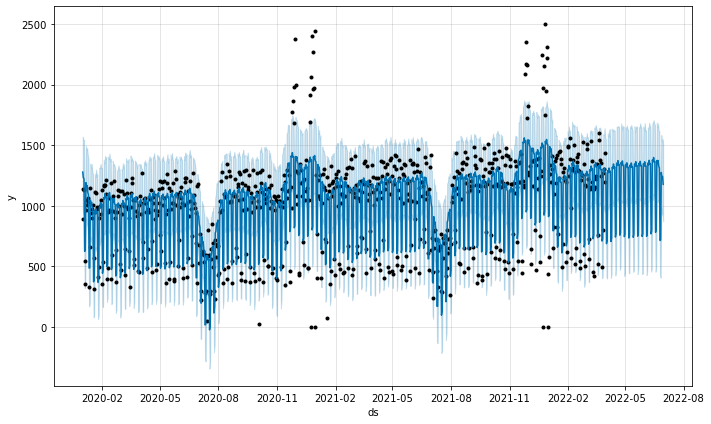

In [107]:
#Date of future values to be predicted
future_june_total = pd.DataFrame({'ds': pd.date_range('2020-01-01','2022-06-30')})

#Make prediction of future total packages
future_june_total_forecast = prophet.predict(future_june_total)

future_june_normal = pd.DataFrame({'ds': pd.date_range('2020-01-01','2022-06-30')})
future_june_normal['total_pack_prediction'] = future_june_total_forecast['yhat']
normal_forecast_june = prophet_normal.predict(future_june_normal)

prophet_normal.plot(normal_forecast_june)
plt.show()